#1 Import python libraries and raw data

In [1]:
#Import python libraries
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import plotly as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

##Daily data

In [2]:
#Input 'raw_data_day.csv'
raw_data_day=pd.read_csv('raw_data_day.csv',index_col='Date')
raw_data_day.rename_axis("Datetime", inplace=True)
raw_data_day.info()
raw_data_day

<class 'pandas.core.frame.DataFrame'>
Index: 3272 entries, 2010-01-04 00:00:00-05:00 to 2022-12-30 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3272 non-null   float64
 1   High          3272 non-null   float64
 2   Low           3272 non-null   float64
 3   Close         3272 non-null   float64
 4   Volume        3272 non-null   int64  
 5   Dividends     3272 non-null   float64
 6   Stock Splits  3272 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 204.5+ KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2010-01-04 00:00:00-05:00,23.372015,23.738395,23.349116,23.623901,38409100,0.0,0.0
2010-01-05 00:00:00-05:00,23.547571,23.738395,23.387279,23.631533,49749600,0.0,0.0
2010-01-06 00:00:00-05:00,23.570467,23.723126,23.295682,23.486506,58182400,0.0,0.0
2010-01-07 00:00:00-05:00,23.379642,23.433074,23.043794,23.242250,50559700,0.0,0.0
2010-01-08 00:00:00-05:00,23.112494,23.570468,23.081961,23.402544,51197400,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,235.520096,238.273195,233.355519,238.133545,21207000,0.0,0.0
2022-12-27 00:00:00-05:00,238.103624,238.333045,235.240799,236.367981,16688600,0.0,0.0
2022-12-28 00:00:00-05:00,236.298135,239.121066,233.584930,233.944031,17457100,0.0,0.0


## 5 minutes data

In [3]:
#Input 'raw_data_5minutes.csv'
raw_data_5min=pd.read_csv('raw_data_5min.csv',index_col='Datetime')
raw_data_5min.info()
raw_data_5min

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 2023-03-01 09:30:00-05:00 to 2023-03-31 15:55:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1794 non-null   float64
 1   High          1794 non-null   float64
 2   Low           1794 non-null   float64
 3   Close         1794 non-null   float64
 4   Volume        1794 non-null   int64  
 5   Dividends     1794 non-null   float64
 6   Stock Splits  1794 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 112.1+ KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-03-01 09:30:00-05:00,249.500000,249.740005,248.020004,248.722000,1828250,0.0,0.0
2023-03-01 09:35:00-05:00,248.720001,249.059998,247.770004,248.179993,772568,0.0,0.0
2023-03-01 09:40:00-05:00,248.164993,248.570007,247.929993,248.279999,544970,0.0,0.0
2023-03-01 09:45:00-05:00,248.300003,249.319901,248.100006,249.240005,513953,0.0,0.0
2023-03-01 09:50:00-05:00,249.250000,249.800003,249.119995,249.729996,546661,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-31 15:35:00-04:00,288.660004,288.660004,288.029999,288.114685,503115,0.0,0.0
2023-03-31 15:40:00-04:00,288.119995,288.260010,287.940002,288.046387,391837,0.0,0.0
2023-03-31 15:45:00-04:00,288.019989,288.440002,287.980011,288.320007,542581,0.0,0.0


#2 Data Cleaning: Null values

##Daily data

In [4]:
#Step 1 Load raw_data_day
rawdata=raw_data_day.copy()

#Step 2 Check Null values 
rows_with_nulls = rawdata[rawdata.isnull().any(axis=1)]
print(rows_with_nulls)

#Step 3 Drop Null values
rawdata.dropna(inplace=True)

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []


## 5 minutes data

In [5]:
#Step 1 Load raw_data_5minutes
rawdata=raw_data_5min.copy()

#Step 2 Check Null values 
rows_with_nulls = rawdata[rawdata.isnull().any(axis=1)]
print(rows_with_nulls)

#Step 3 Drop Null values
rawdata.dropna(inplace=True)

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []


#3 Visualising Raw Data 

###plot_candlestick()

In [6]:
def plot_candlestick(df):
    # Create a candlestick trace using the input DataFrame's columns
    candlestick_trace = go.Candlestick(
        x=df['Datetime'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close']
    )

    # Create a layout for the plot with proper axis titles
    layout = go.Layout(
        title='Raw Data: MSFT Stock Price',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price')
    )

    # Create a figure with the candlestick trace and layout
    fig = go.Figure(data=[candlestick_trace], layout=layout)

    # Display the figure
    fig.show()



##Visualise Raw data

In [7]:
# Plot candlestick chart for raw_data_day
raw_data_day_no_index = raw_data_day.reset_index()
plot_candlestick(raw_data_day_no_index)

# Plot candlestick chart for raw_data_5min
raw_data_5min_no_index = raw_data_5min.reset_index()
plot_candlestick(raw_data_5min_no_index)


#4 Fixed Period Extraction (FPE): 
Extract the Stock Price Range Based on the Given Fixed Period

## Function:fixed_period_extraction()

In [8]:
def fixed_period_extraction(raw_data):
    # Step 1: Select 'High' and 'Low' columns from the input DataFrame
    data = raw_data[['High', 'Low']]

    # Step 2: Calculate the range by subtracting 'Low' from 'High'
    data["Range"] = data['High'] - data['Low']

    # Step 3: Create a new DataFrame with only the 'Range' column
    extracted_data = data[['Range']]

    # Step 4: Convert the index to a list of strings, then parse them as datetime objects without timezone information
    extracted_data.index = [datetime.strptime(str(dt), '%Y-%m-%d %H:%M:%S%z').replace(tzinfo=None) for dt in extracted_data.index]

    # Step 5: Rename the index to 'Datetime'
    extracted_data = extracted_data.rename_axis('Datetime')

    return extracted_data

## Fixed Extraction Results

In [9]:
# Extract fixed_period_data from raw_data_day using the fixed_period_extraction function
fixed_period_extraction_day = fixed_period_extraction(raw_data_day)

# Save fixed_period_data_day to a CSV file
fixed_period_extraction_day.to_csv('fixed_period_extraction_day.csv')


# Extract fixed_period_data from raw_data_5min using the fixed_period_extraction function
fixed_period_extraction_5min = fixed_period_extraction(raw_data_5min)

# Save fixed_period_data_5min to a CSV file
fixed_period_extraction_5min.to_csv('fixed_period_extraction_5min.csv')




<ipython-input-8-2444bcc9ea6b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-2444bcc9ea6b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
# Display fixed_period_data_day
fixed_period_extraction_day

,Range
Datetime,
2010-01-04,0.389279
2010-01-05,0.351115
2010-01-06,0.427443
2010-01-07,0.389279
2010-01-08,0.488507
...,...
2022-12-23,4.917675
2022-12-27,3.092246
2022-12-28,5.536136


In [11]:
# Display fixed_period_data_5min
fixed_period_extraction_5min


,Range
Datetime,
2023-03-01 09:30:00,1.720001
2023-03-01 09:35:00,1.289993
2023-03-01 09:40:00,0.640015
2023-03-01 09:45:00,1.219894
2023-03-01 09:50:00,0.680008
...,...
2023-03-31 15:35:00,0.630005
2023-03-31 15:40:00,0.320007
2023-03-31 15:45:00,0.459991


#5 Variable Period Extraction (VPE)
Extract the Stock Price Range Based on Changeable Periods

###Functions for variable period extraction

In [12]:
def variable_period_extraction(rawdata):
    # Step 1: Create newKdf
    newKdf = newK(rawdata)

    # Step 2: Create df_line
    df_line = create_line(newKdf)

    # Calculate the price range based on df_line
    df_line["previous_plotY"] = df_line['plotY'].shift(1)
    df_line["High_VPE"] = df_line[['plotY', 'previous_plotY']].max(axis=1)
    df_line["Low_VPE"] = df_line[['plotY', 'previous_plotY']].min(axis=1)
    df_line["Range"] = df_line['High_VPE'] - df_line['Low_VPE']

    # Step 3: Create variable_period_extraction
    variable_period_extraction = df_line[['Range']]

    # Step 4: Convert the index to a list of strings and parse them as datetime objects 
    #         without timezone information
    variable_period_extraction.index = [datetime.strptime(str(dt), '%Y-%m-%d %H:%M:%S%z')
                                        .replace(tzinfo=None) 
                                        for dt in variable_period_extraction.index]

    # Step 5: Rename the index
    variable_period_extraction = variable_period_extraction.rename_axis('Datetime')

    return newKdf, df_line, variable_period_extraction

##################################Define functions to Produce New K
def get_col_number(col, df):
    col_number = df.columns.get_loc(col)
    return col_number

def start(df):
    High_number = get_col_number('High', df)
    Low_number = get_col_number('Low', df)

    for i in range(len(df)):
        i += 1
        Hdiff = df.iloc[i, High_number] - df.iloc[i - 1, High_number]
        Ldiff = df.iloc[i, Low_number] - df.iloc[i - 1, Low_number]

        if Hdiff > 0 and Ldiff > 0 or Hdiff < 0 and Ldiff < 0:
            start = i + 1
            break
    return start

def condition(i, j, df):
    High_number = get_col_number('High', df)
    Low_number = get_col_number('Low', df)

    iHigh = df.iloc[i, High_number]
    iLow = df.iloc[i, Low_number]
    jHigh = df.iloc[j, High_number]
    jLow = df.iloc[j, Low_number]
    Hdiff = jHigh - iHigh
    Ldiff = jLow - iLow
    condition = Hdiff * Ldiff
    direction_rise = (Hdiff > 0) & (Ldiff > 0)
    direction_down = (Hdiff < 0) & (Ldiff < 0)

    return condition, direction_rise, direction_down

def newKrise(i, j, df):
    High_number = get_col_number('High', df)
    Low_number = get_col_number('Low', df)

    iHigh = df.iloc[i, High_number]
    iLow = df.iloc[i, Low_number]
    jHigh = df.iloc[j, High_number]
    jLow = df.iloc[j, Low_number]
    newH = max(iHigh, jHigh)
    newL = max(iLow, jLow)

    return newH, newL

def newKdown(i, j, df):
    High_number = get_col_number('High', df)
    Low_number = get_col_number('Low', df)

    iHigh = df.iloc[i, High_number]
    iLow = df.iloc[i, Low_number]
    jHigh = df.iloc[j, High_number]
    jLow = df.iloc[j, Low_number]
    newH = min(iHigh, jHigh)
    newL = min(iLow, jLow)

    return newH, newL

def update_status(i, status, df):
    Status_number = get_col_number('Status', df)
    df.iloc[i, Status_number] = status
    return

def newK(df):
    # Get Start K index
    s = start(df)
    # Add 'Status' column
    df.loc[:, 'Status'] = ''
    # Get column numbers
    High_number = get_col_number('High', df)
    Low_number = get_col_number('Low', df)
    Status_number = get_col_number('Status', df)

    c0, dr0, dd0 = condition(s - 1, s, df)

    for i in range(s, len(df)):
        ci, dri, ddi = condition(i - 1, i, df)

        if ci <= 0:
            if dr0:
                df.iloc[i, High_number], df.iloc[i, Low_number] = newKrise(i - 1, i, df)
                dr0 = True
                update_status(i - 1, 'drop', df)
            elif dd0:
                df.iloc[i, High_number], df.iloc[i, Low_number] = newKdown(i - 1, i, df)
                dd0 = True
                update_status(i - 1, 'drop', df)
            else:
                pass
        else:
            pass

        ci, dri, ddi = condition(i - 1, i, df)

        if ci <= 0:
            if dr0:
                df.iloc[i, High_number], df.iloc[i, Low_number] = newKrise(i - 1, i, df)
                dr0 = True
                update_status(i - 1, 'drop', df)
            elif dd0:
                df.iloc[i, High_number], df.iloc[i, Low_number] = newKdown(i - 1, i, df)
                dd0 = True
                update_status(i - 1, 'drop', df)
            else:
                pass
        else:
            dr0 = dri
            dd0 = ddi

    # Create newKdf
    newKdf = df.loc[df.Status != 'drop']
    return newKdf
#####################################Define functions to produce lines
def identify_rise_down(i, df):
    status_number = get_col_number('Status', df)
    condition1, direction_rise1, direction_down1 = condition(i - 1, i, df)
    if direction_rise1:
        df.iloc[i, status_number] = 'R'
    elif direction_down1:
        df.iloc[i, status_number] = 'D'
    else:
        pass


def identify_top_bottom(i, df):
    status_number = get_col_number('Status', df)
    condition1, direction_rise1, direction_down1 = condition(i - 1, i, df)
    condition2, direction_rise2, direction_down2 = condition(i, i + 1, df)
    status_conditions = [direction_rise1, direction_down1, direction_rise2, direction_down2]
    if status_conditions == [True, False, False, True]:
        df.iloc[i, status_number] = 'T'
    elif status_conditions == [False, True, True, False]:
        df.iloc[i, status_number] = 'B'
    else:
        df.iloc[i, status_number] = 'drop'
    return


def create_line(newKdf):
    # Identify the rise and down K
    for i in range(1, len(newKdf)):
        identify_rise_down(i, newKdf)
    
    # Identify the tops and bottoms
    for i in range(1, len(newKdf) - 1):
        identify_top_bottom(i, newKdf)

    if newKdf.Status.nunique() == 5:
        pass
    else:
        print('Error: newKdf.Status.nunique() != 5')

    # Create the df_line
    df_line = newKdf.loc[newKdf.Status != 'drop']
    # Add plotY column
    df_line.loc[:, 'plotY'] = 0.0
    # Get column's number
    plotY_number = df_line.columns.get_loc('plotY')
    high_number = get_col_number('High', df_line)
    low_number = get_col_number('Low', df_line)
    status_number = get_col_number('Status', df_line)

    # Calculate plotY
    df_line.iloc[0, plotY_number] = df_line.iloc[0, high_number]
    
    for i in range(len(df_line)):
        iHigh = df_line.iloc[i, high_number]
        iLow = df_line.iloc[i, low_number]
        plotY1 = max(iHigh, iLow)
        plotY2 = min(iHigh, iLow)

        if df_line.iloc[i, status_number] == 'T':
            df_line.iloc[i, plotY_number] = plotY1
        elif df_line.iloc[i, status_number] == 'B':
            df_line.iloc[i, plotY_number] = plotY2
        elif df_line.iloc[i, status_number] == 'R':
            df_line.iloc[i, plotY_number] = plotY1
        elif df_line.iloc[i, status_number] == 'D':
            df_line.iloc[i, plotY_number] = plotY2
        else:
            print('Pass:', i)

    # Check if there are two or more adjacent T or B
    df_line.loc[:, 'check'] = df_line.Status.shift()

    if len(df_line.query('Status == check')) == 0:
        print('---------- There are no over two T or B that are adjacent -------------')
    else:
        print(df_line.query('Status == check'))

    return df_line


###Function:convert_line_into_candlestick_chart

In [13]:
def convert_line_into_candlestick_chart(df):
  
  fig = go.Figure()

  #Plot candlestick chart
  fig.add_trace(go.Candlestick(
      x=df.Datetime,
      open=df.High_VPE,
      high=df.High_VPE,
      low=df.Low_VPE,
      close=df.Low_VPE,
      name='Price Range Chart: Variable Period Extraction'
  ))

  #Plot Line
  fig.add_trace(go.Scatter(
      x=df.Datetime,
      y=df.plotY,
      mode="lines",
      line=dict(color="blue"),
      name="Lines"
  ))
  fig.show()


##Variable Extraction Results

###Daily data

In [14]:
newKdf_day,df_line_day,variable_period_extraction_day=variable_period_extraction(raw_data_day)
#Output variable_period_extraction_day
variable_period_extraction_day.to_csv('variable_period_extraction_day.csv')

<ipython-input-12-1c93c9701447>:186: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-1c93c9701447>:214: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-1c93c9701447>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-1c9

Pass: 0
---------- There are no over two T or B that are adjacent -------------


In [15]:
newKdf_day

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Status
Datetime,,,,,,,,
2010-01-04 00:00:00-05:00,23.372015,23.738395,23.349116,23.623901,38409100,0.0,0.0,
2010-01-05 00:00:00-05:00,23.547571,23.738395,23.387279,23.631533,49749600,0.0,0.0,drop
2010-01-06 00:00:00-05:00,23.570467,23.723126,23.295682,23.486506,58182400,0.0,0.0,drop
2010-01-07 00:00:00-05:00,23.379642,23.433074,23.043794,23.242250,50559700,0.0,0.0,B
2010-01-08 00:00:00-05:00,23.112494,23.570468,23.081961,23.402544,51197400,0.0,0.0,T
...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,244.248229,244.597360,238.113600,239.849243,29696400,0.0,0.0,drop
2022-12-20 00:00:00-05:00,238.801864,242.303104,237.824317,241.195877,25150800,0.0,0.0,B
2022-12-21 00:00:00-05:00,241.086146,245.006319,239.510091,243.819290,23690600,0.0,0.0,T


In [16]:
df_line_day

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Status,plotY,check,previous_plotY,High_VPE,Low_VPE,Range
Datetime,,,,,,,,,,,,,,
2010-01-04 00:00:00-05:00,23.372015,23.738395,23.349116,23.623901,38409100,0.0,0.0,,23.738395,None,NaN,23.738395,23.738395,0.000000
2010-01-07 00:00:00-05:00,23.379642,23.433074,23.043794,23.242250,50559700,0.0,0.0,B,23.043794,,23.738395,23.738395,23.043794,0.694601
2010-01-08 00:00:00-05:00,23.112494,23.570468,23.081961,23.402544,51197400,0.0,0.0,T,23.570468,B,23.043794,23.570468,23.043794,0.526674
2010-01-12 00:00:00-05:00,23.013265,23.204088,22.830075,22.952202,65912100,0.0,0.0,B,22.830075,T,23.570468,23.570468,22.830075,0.740393
2010-01-19 00:00:00-05:00,23.471245,23.845258,23.440700,23.738398,46575700,0.0,0.0,T,23.845258,B,22.830075,23.845258,22.830075,1.015183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-14 00:00:00-05:00,256.487591,263.260617,253.674629,256.577362,35410900,0.0,0.0,T,263.260617,B,241.604853,263.260617,241.604853,21.655764
2022-12-20 00:00:00-05:00,238.801864,242.303104,237.824317,241.195877,25150800,0.0,0.0,B,237.824317,T,263.260617,263.260617,237.824317,25.436300
2022-12-21 00:00:00-05:00,241.086146,245.006319,239.510091,243.819290,23690600,0.0,0.0,T,245.006319,B,237.824317,245.006319,237.824317,7.182002


In [17]:
variable_period_extraction_day

,Range
Datetime,
2010-01-04,0.000000
2010-01-07,0.694601
2010-01-08,0.526674
2010-01-12,0.740393
2010-01-19,1.015183
...,...
2022-12-14,21.655764
2022-12-20,25.436300
2022-12-21,7.182002


In [18]:
new_df_line_day=df_line_day.reset_index()

In [19]:
convert_line_into_candlestick_chart(new_df_line_day)

###5 min data

In [20]:
newKdf_5min,df_line_5min,variable_period_extraction_5min=variable_period_extraction(raw_data_5min)
#Output variable_period_extraction_5min
variable_period_extraction_5min.to_csv('variable_period_extraction_5min.csv')

<ipython-input-12-1c93c9701447>:186: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pass: 0
---------- There are no over two T or B that are adjacent -------------


<ipython-input-12-1c93c9701447>:214: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-1c93c9701447>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-1c93c9701447>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-1c93

In [21]:
newKdf_5min

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Status
Datetime,,,,,,,,
2023-03-01 09:30:00-05:00,249.500000,249.740005,248.020004,248.722000,1828250,0.0,0.0,
2023-03-01 09:35:00-05:00,248.720001,249.059998,247.770004,248.179993,772568,0.0,0.0,drop
2023-03-01 09:40:00-05:00,248.164993,248.570007,247.929993,248.279999,544970,0.0,0.0,drop
2023-03-01 09:45:00-05:00,248.300003,249.319901,248.100006,249.240005,513953,0.0,0.0,drop
2023-03-01 09:50:00-05:00,249.250000,249.800003,249.119995,249.729996,546661,0.0,0.0,drop
...,...,...,...,...,...,...,...,...
2023-03-31 15:30:00-04:00,288.679993,288.799988,288.529999,288.670013,401645,0.0,0.0,T
2023-03-31 15:35:00-04:00,288.660004,288.660004,288.029999,288.114685,503115,0.0,0.0,drop
2023-03-31 15:40:00-04:00,288.119995,288.260010,287.940002,288.046387,391837,0.0,0.0,B


In [22]:
df_line_5min

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Status,plotY,check,previous_plotY,High_VPE,Low_VPE,Range
Datetime,,,,,,,,,,,,,,
2023-03-01 09:30:00-05:00,249.500000,249.740005,248.020004,248.722000,1828250,0.0,0.0,,249.740005,None,NaN,249.740005,249.740005,0.000000
2023-03-01 10:00:00-05:00,249.630005,249.929993,249.199997,248.740005,480042,0.0,0.0,T,249.929993,,249.740005,249.929993,249.740005,0.189987
2023-03-01 10:15:00-05:00,247.539993,247.899994,247.360001,247.809998,301498,0.0,0.0,B,247.360001,T,249.929993,249.929993,247.360001,2.569992
2023-03-01 10:25:00-05:00,247.949997,248.169998,247.610001,247.660004,162349,0.0,0.0,T,248.169998,B,247.360001,248.169998,247.360001,0.809998
2023-03-01 10:30:00-05:00,247.669998,247.690002,247.250000,247.449997,335942,0.0,0.0,B,247.250000,T,248.169998,248.169998,247.250000,0.919998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 14:40:00-04:00,286.799988,286.970001,286.750000,286.799988,146294,0.0,0.0,T,286.970001,B,286.459991,286.970001,286.459991,0.510010
2023-03-31 14:50:00-04:00,286.855011,286.860992,286.640015,286.950012,205522,0.0,0.0,B,286.640015,T,286.970001,286.970001,286.640015,0.329987
2023-03-31 15:30:00-04:00,288.679993,288.799988,288.529999,288.670013,401645,0.0,0.0,T,288.799988,B,286.640015,288.799988,286.640015,2.159973


In [23]:
variable_period_extraction_5min

,Range
Datetime,
2023-03-01 09:30:00,0.000000
2023-03-01 10:00:00,0.189987
2023-03-01 10:15:00,2.569992
2023-03-01 10:25:00,0.809998
2023-03-01 10:30:00,0.919998
...,...
2023-03-31 14:40:00,0.510010
2023-03-31 14:50:00,0.329987
2023-03-31 15:30:00,2.159973


In [24]:
new_df_line_5min=df_line_5min.reset_index()

In [25]:
convert_line_into_candlestick_chart(new_df_line_5min)

#6 Visualise Extraction Results

In [26]:
def plot_time_series(time_series):
    # Create a new figure and axis
    fig, ax = plt.subplots()
    
    # Plot the time series on the axis
    time_series.plot(ax=ax)

    # Set the x-axis tick frequency and rotation
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Set the title and labels for the plot
    plt.title('Time Series: Stock Price Range Extraction Result')
    plt.xlabel('Time')
    plt.ylabel('Value')

    # Display the plot
    plt.show()


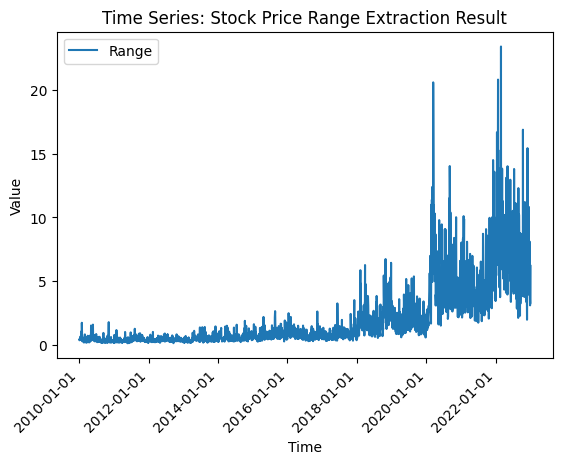

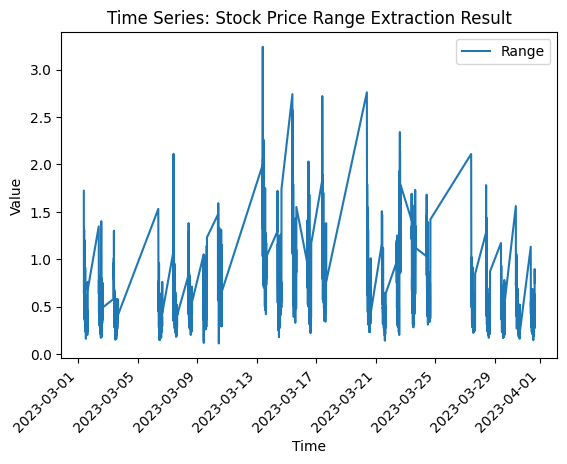

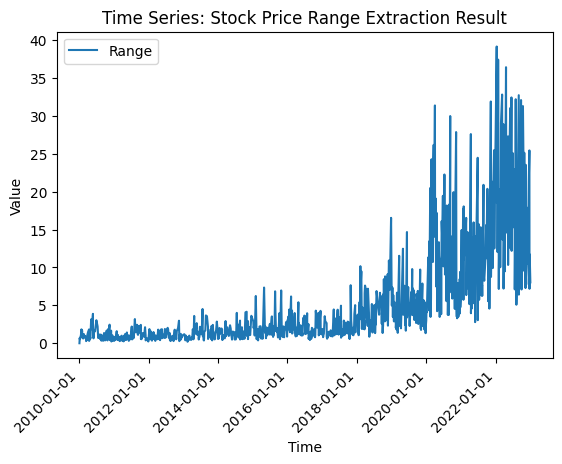

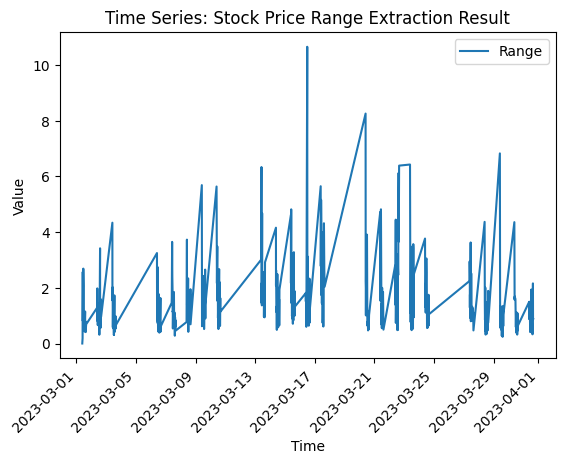

In [27]:
# Plot the time series for fixed_period_data_day
plot_time_series(fixed_period_extraction_day)

# Plot the time series for fixed_period_data_5min
plot_time_series(fixed_period_extraction_5min)

# Plot the time series for fixed_period_data_day
plot_time_series(variable_period_extraction_day)

# Plot the time series for fixed_period_data_5min
plot_time_series(variable_period_extraction_5min)

#6 Stationarity test

##Function:stationarity_test()



```
def stationarity_test(time_series, column_name='Range'):
    # Step 1: Perform the Augmented Dickey-Fuller test
    result = adfuller(time_series[column_name])

    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

    # Step 2: Interpret the ADF test result
    alpha = 0.05
    if result[1] < alpha:
        print('The time series is stationary.')
    else:
        print('The time series is non-stationary.')
```



In [28]:
def stationarity_test(time_series, column_name='Range'):
    # Step 1: Perform the Augmented Dickey-Fuller test
    result = adfuller(time_series[column_name])

    print('ADF Statistic: {:.4f}'.format(result[0]))
    print('p-value: {:.4f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.4f}'.format(key, value))

    # Step 2: Interpret the ADF test result
    alpha = 0.05
    if result[1] < alpha:
        print('The time series is stationary.')
    else:
        print('The time series is non-stationary.')


In [ ]:
# Test stationarity for fixed_period_extraction_day
stationarity_test(fixed_period_extraction_day, column_name='Range')
# Test stationarity for variable_period_extraction_day
stationarity_test(variable_period_extraction_day, column_name='Range')

# Test stationarity for fixed_period_extraction_5min
stationarity_test(fixed_period_extraction_5min, column_name='Range')
# Test stationarity for variable_period_extraction_5min
stationarity_test(variable_period_extraction_5min, column_name='Range')


In [29]:
# Test stationarity for fixed_period_extraction_day
stationarity_test(fixed_period_extraction_day, column_name='Range')

ADF Statistic: -2.1433
p-value: 0.2275
Critical Values:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5672
The time series is non-stationary.


In [30]:
# Test stationarity for fixed_period_extraction_5min
stationarity_test(fixed_period_extraction_5min, column_name='Range')

ADF Statistic: -6.6985
p-value: 0.0000
Critical Values:
	1%: -3.4340
	5%: -2.8632
	10%: -2.5676
The time series is stationary.


In [31]:
# Test stationarity for variable_period_extraction_day
stationarity_test(variable_period_extraction_day, column_name='Range')

ADF Statistic: -1.3080
p-value: 0.6255
Critical Values:
	1%: -3.4362
	5%: -2.8641
	10%: -2.5681
The time series is non-stationary.


In [32]:
# Test stationarity for variable_period_extraction_5min
stationarity_test(variable_period_extraction_5min, column_name='Range')

ADF Statistic: -8.0782
p-value: 0.0000
Critical Values:
	1%: -3.4414
	5%: -2.8664
	10%: -2.5694
The time series is stationary.
